# Homework 6
## Name: Thomas Saltos

## Exercise 2

In [3]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

import numpy.matlib
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal, norm

Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

## Dataset X1

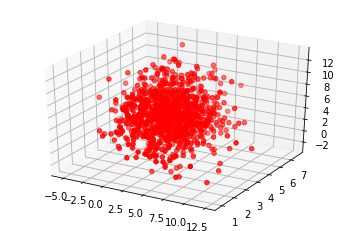

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,1],X1[:,2],X1[:,3],c='r', marker='o')
plt.show()

- Histogram of the distances of the data samples from their sample mean

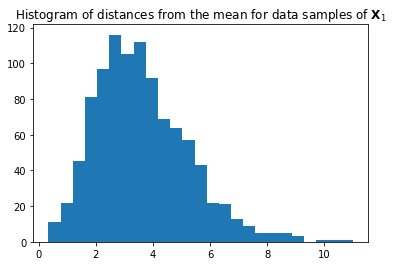

In [5]:
x1_mean = np.mean(X1,axis=0)
Dista = np.zeros(len(X1))
for i in range(len(X1)):
    Dista[i] = np.linalg.norm(X1[i,:] - x1_mean)

plt.hist(Dista,bins='auto')
plt.title('Histogram of distances from the mean for data samples of $\mathbf{X}_1$')
plt.show()

In [6]:
mean_X1 = np.mean(X1,axis=0)
N1 = len(X1)
Cov_X1 = (1/N1)*(((X1 - np.matlib.repmat(mean_X1,N1,1)).T).dot((X1 -
np.matlib.repmat(mean_X1,N1,1))))
mean_X1

array([1.88364427, 2.94930523, 3.94277602, 4.91643708])

In [7]:
X1_test = np.array([[2.01,2.99,3.98,5.02],[20.78,-15.76,19.38,-25.02],[3.08,3.88,4.15,6.02]])
P1 = multivariate_normal.pdf(X1_test,mean_X1,Cov_X1)
P1

array([3.37904075e-003, 1.65657893e-208, 1.95207559e-003])

## Dataset X2

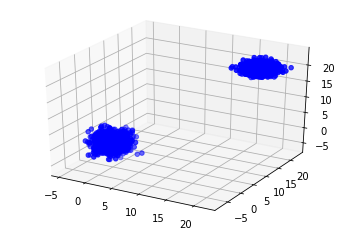

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X2[:,1],X2[:,2],X2[:,3],c='b', marker='o')
plt.show()

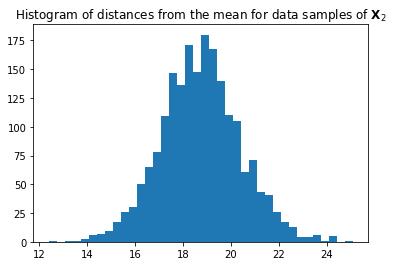

In [9]:
x2_mean = np.mean(X2,axis=0)
Dista2 = np.zeros(len(X2))
for i in range(len(X2)):
    Dista2[i] = np.linalg.norm(X2[i,:] - x2_mean)

plt.hist(Dista2,bins='auto')
plt.title('Histogram of distances from the mean for data samples of $\mathbf{X}_2$')
plt.show()

In [10]:
from sklearn import mixture
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X2)
X2_test = np.array([[0.05, 0.15,-0.12,-0.08],[7.18, 7.98,9.12,9.94],[3.48,4.01,4.55,4.96],[20.78,-15.76,19.38,-25.02]])
P2 = np.exp(clf.score_samples(X2_test))
P2

array([1.57831095e-003, 1.80488930e-024, 8.69261803e-009, 7.60251661e-105])

## Exercise 3

a) A is a (528x485) array corresponding to the image 'huble_tel.jpg'.

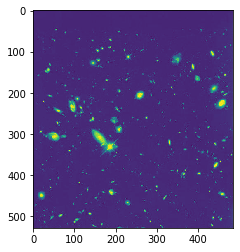

In [11]:
import matplotlib.image as mpimg
A = mpimg.imread('huble_tel.jpg')
plt.imshow(A)
plt.show()

b) Producτion of 15 noisy versions of the image adding Gaussian noise with zero mean and variance 256 following the given instructions.

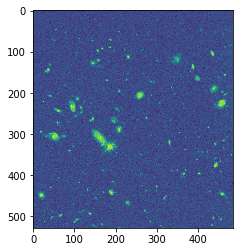

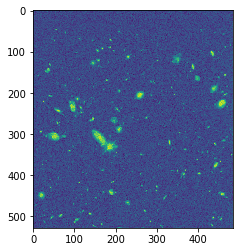

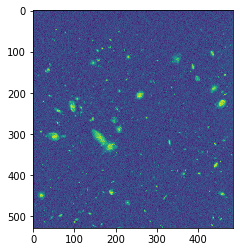

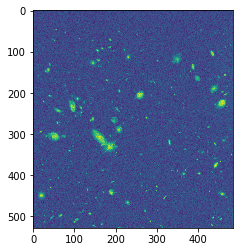

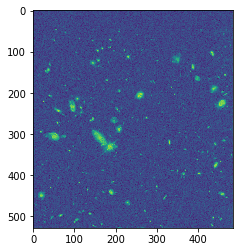

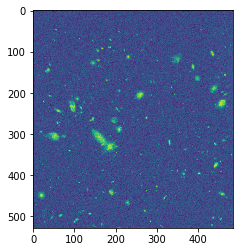

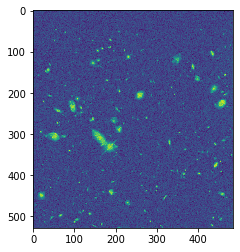

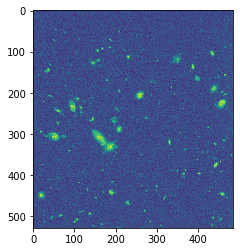

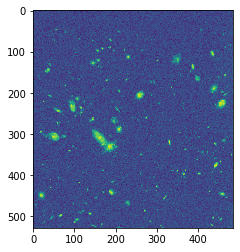

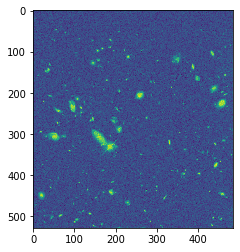

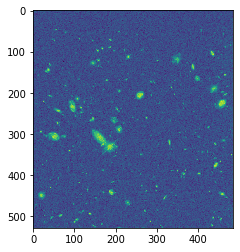

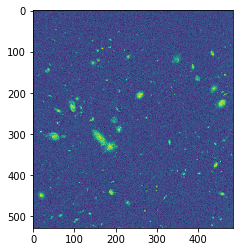

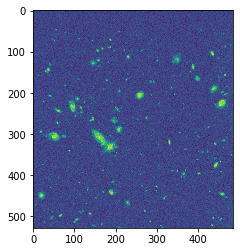

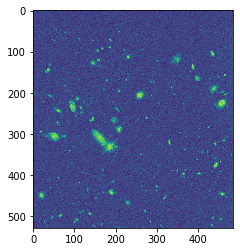

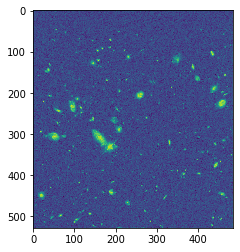

In [12]:
from numpy import empty

C_sum = empty(A.shape)

for i in range(15):
    B_i=np.sqrt(256)*np.random.normal(0,1,A.shape) #gaussian noise matrix
    C_i=A+B_i #noisy version of A
    plt.imshow(C_i)
    plt.show()
    C_sum += C_i  # the sum will be used below to compute the average of the noisy versions

c) Average of the 15 noisy versions of A.

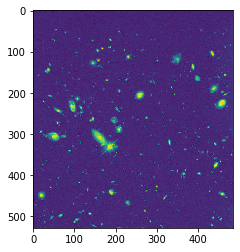

In [13]:
C_avg = C_sum/15
plt.imshow(C_avg)
plt.show()

The averaged image over the 15 noisy versions of the original image is clearly less noisy than the noisy versions. Compared with the original image, noise is still present in the averaged image but has been efficiently suppressed considering from where we started. The above method is in fact the ML method applied for 15 different data sets assuming the data were generated by a normal distribution of unknown mean. Improved noise suppression/removal can be achieved if we increase the number of available noisy images.